In [1]:
# Imports packages required.
import pandas as pd
import matplotlib.pyplot as plt
import os
from selenium import webdriver
from bs4 import BeautifulSoup
import lxml
from requests_html import HTMLSession

In [2]:
# Import one of the csv files to work on data manipulation
dat = pd.read_csv('CSVData/UVA 1.csv')

In [3]:
# Display DataFrame
dat

,Name,Position,Duration,1. Baserunning Situation,1. Date,1. Pitchers Name,1. Pitchers Side,2. Hitters Name,2. Hitters Side,3. Pitch Type,...,8. Hit Results,8. RBI,8. Well Hit,9. Outs,Period,Team 1. Pitchers Name,Team 2. Hitters Name,XY Hit Location,XY Pitch Location,Z-Game Details
0,UVA vs Virginia Tech,0,7808,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,453;438,UVA vs Virginia Tech
1,UVA vs Virginia Tech (1),7808,12346,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,300;463,UVA vs Virginia Tech
2,UVA vs Virginia Tech (2),20153,9710,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,244;391,UVA vs Virginia Tech
3,UVA vs Virginia Tech (3),29863,12312,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,386;325,UVA vs Virginia Tech
4,UVA vs Virginia Tech (4),42176,12045,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,427;457,UVA vs Virginia Tech
5,UVA vs Virginia Tech (5),54221,10878,Bases Empty,04-13-2018,19 Erika Osherow,R-Hand,2 Caroline Schoenewald,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,414;473,UVA vs Virginia Tech
6,UVA vs Virginia Tech (6),65098,14915,R1,04-13-2018,19 Erika Osherow,R-Hand,10 Olivia Lattin,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,360;368,UVA vs Virginia Tech
7,UVA vs Virginia Tech (7),80013,11845,R1,04-13-2018,19 Erika Osherow,R-Hand,10 Olivia Lattin,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,137;77,UVA vs Virginia Tech
8,UVA vs Virginia Tech (8),91859,12946,R1,04-13-2018,19 Erika Osherow,R-Hand,10 Olivia Lattin,R-Hand,NaN,...,NaN,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,NaN,333;234,UVA vs Virginia Tech
9,UVA vs Virginia Tech (9),104805,28795,R1,04-13-2018,19 Erika Osherow,R-Hand,10 Olivia Lattin,R-Hand,NaN,...,Fly Out,NaN,NaN,0 Out,1. Inning,UVA,Virginia Tech,302;343,192;217,UVA vs Virginia Tech


In [8]:
# Show names of columns in csv file.
dat.columns

Index(['Name', 'Position', 'Duration', '1. Baserunning Situation', '1. Date',
       '1. Pitchers Name', '1. Pitchers Side', '2. Hitters Name',
       '2. Hitters Side', '3. Pitch Type', '4. Pitch Location',
       '5. Catcher Throw Down', '5. Game Pitch Result', '6. Pitch Count',
       '6. Previous Pitch Count', '8. Hit Location', '8. Hit Results',
       '8. RBI', '8. Well Hit', '9. Outs', 'Period', 'Team 1. Pitchers Name',
       'Team 2. Hitters Name', 'XY Hit Location', 'XY Pitch Location',
       'Z-Game Details'],
      dtype='object')

In [9]:
woo = subset(dat, cols = ['XY Pitch Location', '5. Game Pitch Result'])

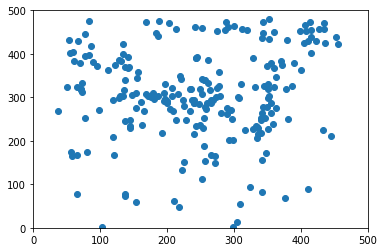

In [10]:
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.scatter(woo['x'], woo['y'])

In [7]:
# Define function to subset a data frame
def subset(df, cols = ['XY Pitch Location', '5. Game Pitch Result']):
    df2 = pd.DataFrame()
    for name in cols:
        if(name == 'XY Pitch Location'):
            x = list()
            y = list()
            for pair in df[name]:
                vals = pair.split(';')
                x.append(int(vals[0]))
                y.append(int(vals[1]))
            df2['x'] = x
            df2['y'] = y
        else:
            df2[name] = df[name]
    return(df2)

In [27]:
# Scratch Work

In [11]:

session = HTMLSession()

r = session.get('http://theacc.com/calendar.aspx')
soup = BeautifulSoup(r.text, 'lxml')
soup.findAll('a')

[<a class="sidearm-skip-link" href="#main-content">Skip To Main Content</a>,
 <a aria-label="Go To Homepage" href="/index.aspx"><img alt="ACC" src="https://s3.amazonaws.com/sidearm.sites/acc.sidearmsports.com/images/responsive_2019/svg/logo_main.svg"/></a>,
 <a data-bind="text: away.short_display || away.title, attr: { href: away.athletics_website }" target="_blank"></a>,
 <a data-bind="text: home.short_display || home.title, attr: { href: home.athletics_website }" target="_blank"></a>,
 <a data-bind="href: media.stats.url" target="_blank">Stats</a>,
 <a data-bind="html: 'Radio: ' + media.radio"></a>,
 <a data-bind="href: media.audio.url, text: media.audio.title" target="_blank">Audio</a>,
 <a data-bind="html: 'TV: ' + media.tv"></a>,
 <a data-bind="href: media.video.url, text: media.video.title" target="_blank">Video</a>,
 <a data-bind="href: media.gamecenter.url, text: media.gamecenter.title">Game Center</a>,
 <a data-bind="href: result.boxscore.url">Box Score</a>,
 <a data-bind="hre